In [47]:
from textstat.textstat import textstat
import csv

In [48]:
import pandas
import matplotlib
#matplotlib.style.use('ggplot')
%matplotlib inline

# Reading Level Analysis for All Clinton since 1/1

In [49]:
clinton_df = pandas.read_csv('data/all_clinton.csv')
print len(clinton_df)
clinton_df.head()


1097


,title,url,org,date_written,byline,body
0,10 Notable DNC Members From Illinois Announce ...,http://www.huffingtonpost.com/reboot-illinois/...,huffpo,2016-01-29 20:29:56,NaN,Ten prominent Illinoisans and members of the D...
1,2015 Brought Big Money For Clinton And Bush; S...,http://www.npr.org/2016/02/01/465095927/2015-b...,npr,2016-02-01 17:30:52,NaN,\n\n\n\ni\n\n\n\n\n Republican pres...
2,2016 in SC: Chelsea Clinton visits for first t...,http://www.mcclatchydc.com/news/politics-gover...,mcclatchy,2016-02-02 17:06:12,NaN,South Carolina will have finally 2016 campaign...
3,22 Hillary Clinton emails declared 'top secret...,http://www.politico.com/story/2016/01/22-hilla...,politico,2016-01-29 20:27:10,NaN,\n01/29/16 03:46 PM EST\n\n ...
4,2 Clintons and plenty of Republicans in motion,http://hosted2.ap.org/APDEFAULT/3d281c11a96b4a...,ap,2016-01-04 21:49:34,NaN,"BOONE, Iowa (AP) â The sprint to the Iowa ca..."


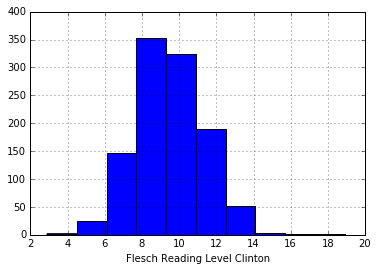

In [56]:
clinton_df['flesch'] = clinton_df['body'].apply(lambda x: textstat.flesch_kincaid_grade(x) if type(x) == str else None)
# Average Flesch-Kincaid grade for AP stories: 9.97941176471
clinton_df['flesch'].hist().set_xlabel("Flesch Reading Level Clinton") 

Average Gunning-Fog grade for AP stories: 9.7742935278


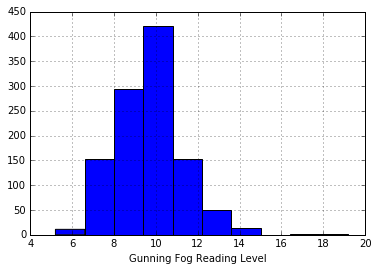

In [51]:
clinton_df['gunning_fog'] = clinton_df['body'].apply(lambda x: textstat.gunning_fog(x) if type(x) == str else None)
print "Average Gunning-Fog grade for AP stories:", clinton_df['gunning_fog'].mean()
# Average Flesch-Kincaid grade for AP stories: 9.85789473684
clinton_df['gunning_fog'].hist().set_xlabel("Gunning Fog Reading Level") 

# Reading level by Org

In [52]:
orgs = ['nyt', 'wsj', 'cnn', 'fox', 'ap', 'reuters', 'politico', 'mcclatchy', 'buzzfeed', 'huffpo','latimes']
for o in orgs:
    clinton_df['flesch_' + o] = clinton_df[clinton_df['org'] == o]['body'].apply(lambda x: textstat.flesch_kincaid_grade(x) if type(x) == str else None)
    print "Average Flesch-Kincaid grade for " + o + " stories:", clinton_df['flesch_' + o].mean()
    # Average Flesch-Kincaid grade for AP stories: 9.97941176471
    

Average Flesch-Kincaid grade for nyt stories: 8.31041666667
Average Flesch-Kincaid grade for wsj stories: 8.48666666667
Average Flesch-Kincaid grade for cnn stories: 9.97672413793
Average Flesch-Kincaid grade for fox stories: 9.97043478261
Average Flesch-Kincaid grade for ap stories: 9.99416666667
Average Flesch-Kincaid grade for reuters stories: 10.6911111111
Average Flesch-Kincaid grade for politico stories: 9.05913978495
Average Flesch-Kincaid grade for mcclatchy stories: 9.17105263158
Average Flesch-Kincaid grade for buzzfeed stories: 13.82
Average Flesch-Kincaid grade for huffpo stories: 10.1356589147
Average Flesch-Kincaid grade for latimes stories: 10.1435483871


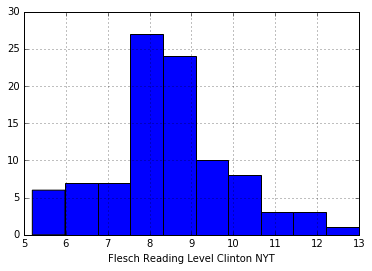

In [53]:
o = 'nyt'
clinton_df['flesch_'+ o].hist().set_xlabel("Flesch Reading Level Clinton NYT") 

In [54]:
for o in orgs:
    clinton_df['gunning_' + o] = clinton_df[clinton_df['org'] == o]['body'].apply(lambda x: textstat.gunning_fog(x) if type(x) == str else None)
    print "Average Gunning Fog grade for " + o + " stories:", clinton_df['gunning_' + o].mean()
    # Average Flesch-Kincaid grade for AP stories: 9.97941176471
    

Average Gunning Fog grade for nyt stories: 8.45416666667
Average Gunning Fog grade for wsj stories: 8.256
Average Gunning Fog grade for cnn stories: 9.95862068966
Average Gunning Fog grade for fox stories: 9.43304347826
Average Gunning Fog grade for ap stories: 9.67333333333
Average Gunning Fog grade for reuters stories: 10.0977777778
Average Gunning Fog grade for politico stories: 10.8616487455
Average Gunning Fog grade for mcclatchy stories: 8.97894736842
Average Gunning Fog grade for buzzfeed stories: 12.8
Average Gunning Fog grade for huffpo stories: 9.63720930233
Average Gunning Fog grade for latimes stories: 9.63225806452


In [55]:
for o in orgs:
    clinton_df['ease_' + o] = clinton_df[clinton_df['org'] == o]['body'].apply(lambda x: textstat.flesch_reading_ease(x) if type(x) == str else None)
    print "Average F-K Reading Ease for " + o + " stories:", clinton_df['ease_' + o].mean()
 
    

Average F-K Reading Ease for nyt stories: 64.2652083333
Average F-K Reading Ease for wsj stories: 62.1454666667
Average F-K Reading Ease for cnn stories: 59.0134482759
Average F-K Reading Ease for fox stories: 56.662173913
Average F-K Reading Ease for ap stories: 57.5051666667
Average F-K Reading Ease for reuters stories: 54.5011111111
Average F-K Reading Ease for politico stories: 69.5800716846
Average F-K Reading Ease for mcclatchy stories: 60.4468421053
Average F-K Reading Ease for buzzfeed stories: 44.074
Average F-K Reading Ease for huffpo stories: 56.4266666667
Average F-K Reading Ease for latimes stories: 56.3401612903
